In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,The Core,2003,Alejandro Abellan,actor,U.S.S. Soldier,NaN
1,Il momento di uccidere,1968,Remo De Angelis,actor,Dago,9
2,Across the Divide,1921,Thomas Delmar,actor,Dago,4
3,Revan,2012,Diego James,actor,Dago,NaN
4,Un homme marche dans la ville,1950,Fabien Loris,actor,Dago,12


In [4]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,0_1_0,2008,Poland,2008-11-14
1,Ai no Sanka,1967,Japan,1967-01-01
2,A Thousand to One,1920,USA,1920-12-07
3,A Prince of a King,1923,USA,1923-10-13
4,A Prince of a King,1923,Netherlands,1924-08-08


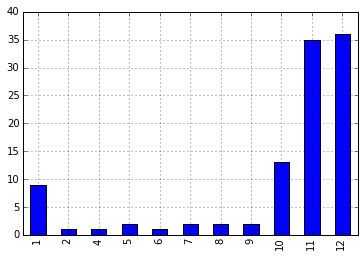

In [5]:
# Make a bar plot of the months in which movies
# with "Christmas" in their title tend to be released in the USA.

rd = release_dates
rd = rd[rd.title.str.contains('Christmas')]
rd = rd[rd.country == 'USA']
rd.date.dt.month.value_counts().sort_index().plot(kind='bar')

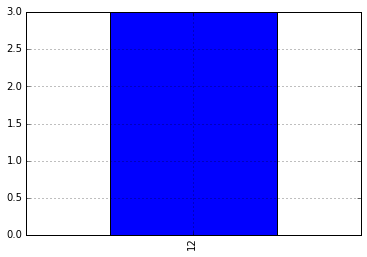

In [6]:
# Make a bar plot of the months in which movies
# whose titles start with "The Hobbit" are released in the USA.

rd = release_dates
rd = rd[rd.title.str.startswith('The Hobbit')]
rd = rd[rd.country == 'USA']
rd.date.dt.month.value_counts().sort_index().plot(kind='bar')

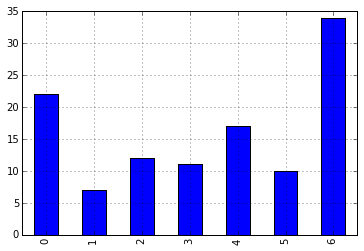

In [7]:
# Make a bar plot of the day of the week on which movies
# with "Romance" in their title tend to be released in the USA.

rd = release_dates
rd = rd[rd.title.str.contains('Romance')]
rd = rd[rd.country == 'USA']
rd.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

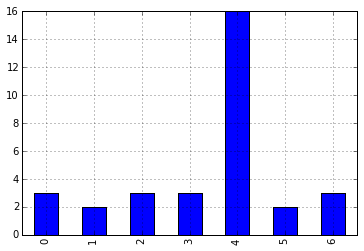

In [8]:
# Make a bar plot of the day of the week on which movies
# with "Action" in their title tend to be released in the USA.

rd = release_dates
rd = rd[rd.title.str.contains('Action')]
rd = rd[rd.country == 'USA']
rd.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

In [9]:
# On which date was each Judi Dench movie from the 1990s released in the USA?

usa = release_dates[release_dates.country == 'USA']

c = cast
c = c[c.name == 'Judi Dench']
c = c[c.year // 10 * 10 == 1990]
c.merge(usa).sort('date')

,title,year,name,type,character,n,country,date
1,GoldenEye,1995,Judi Dench,actress,M,6,USA,1995-11-17
0,Jack & Sarah,1995,Judi Dench,actress,Margaret,3,USA,1996-03-22
7,Hamlet,1996,Judi Dench,actress,Hecuba,12,USA,1996-12-25
5,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1,USA,1997-07-18
2,Tomorrow Never Dies,1997,Judi Dench,actress,M,9,USA,1997-12-19
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12,USA,1999-01-08
6,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2,USA,1999-05-14
3,The World Is Not Enough,1999,Judi Dench,actress,M,6,USA,1999-11-19


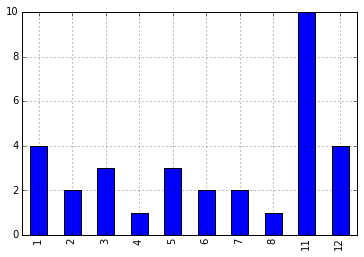

In [12]:
# In which months do films with Judi Dench tend to be released in the USA?

c = cast
c = c[c.name == 'Judi Dench']
m = c.merge(usa).sort('date')
m.date.dt.month.value_counts().sort_index().plot(kind='bar')

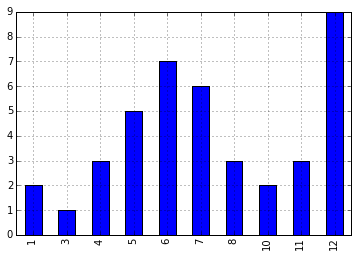

In [13]:
# In which months do films with Tom Cruise tend to be released in the USA?

c = cast
c = c[c.name == 'Tom Cruise']
m = c.merge(usa).sort('date')
m.date.dt.month.value_counts().sort_index().plot(kind='bar')